# Исследование рынка общественного питания в Москве


### Цели и задачи проекта

Познакомиться с данными датасетов `/datasets/rest_info.csv` и `/datasets/rest_price.csv`, которые содержат информацию о заведениях общественного питания Москвы и информацию о средних чеках в этих заведениях. Необходимо провести общий анализ данных, их предобработку, затем нужно ответить на вопросы заказчика, используя методы визуализации. 

### Описание данных
Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
0 — заведение не является сетевым;
1 — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
- «Средний счёт: 1000–1500 ₽»;
- «Цена чашки капучино: 130–220 ₽»;
- «Цена бокала пива: 400–600 ₽».
и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:
- Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
- Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
- Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

Шаг 1. Загрузка данных и знакомство с ними. 
1. Загрузить данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.
2. Познакомиться с данными и изучить общую информацию о них.
3. Сделать вывод о полученных данных: каков объём данных, соответствуют ли данные описанию, встречаются ли пропущенные значения, используются ли верные типы данных.
3. Отметить другие особенности данных, которые могут обнаружиться на этой стадии и на которые стоит обратить внимание при предобработке.
4. Объединить данные двух датасетов в один, с которым продолжим работу.

Шаг 2. Предобработка данных.

1. Изучить корректность типов данных и при необходимости провести их преобразование. 
2. Изучить пропущенные значения в данных.
3. Проверить данные на явные и неявные дубликаты.
4. Для дальнейшей работы выделить новые столбцы:
создать столбец is_24_7 с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
логическое значение True — если заведение работает ежедневно и круглосуточно;
логическое значение False — в противоположном случае.
5. Сформулировать промежуточный вывод о проделанной работе.

Шаг 3. Исследовательский анализ данных (с применением визуализации). 

1. Исследовать количество объектов общественного питания по каждой категории заведения. 
2. Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. 
3. Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.
4. Исследовать количество посадочных мест в заведениях. Привести для каждой категории заведений наиболее типичное для него количество посадочных мест.
5. Исследовать рейтинг заведений. 
6. Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений.
7. Сгруппировать данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитать значения среднего рейтинга. 
8. Изучить вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. 

Шаг 4. Итоговый вывод и рекомендации. 

По результатам проведённого исследовательского анализа данных сформулировать итоговый вывод и рекомендации для заказчика. 

## 1. Загрузка данных и знакомство с ними


In [1]:
# Эта ячейка исправит проблему SSL если она есть
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [2]:
# устанавливаем библиотеку phik
!pip install phik

zsh:1: command not found: pip


In [3]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем данные датасетов

df_rest = pd.read_csv('https://code.s3.yandex.net//datasets/rest_info.csv')
df_price = pd.read_csv('https://code.s3.yandex.net//datasets/rest_price.csv')

- Познакомьтесь с данными и изучите общую информацию о них.

In [4]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


In [5]:
df_rest.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [6]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


In [7]:
df_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод


Промежуточный вывод о датасете `/datasets/rest_info.csv`:
- Всего в датасете 8406 строки и 9 столбцов.
- Такие столбцы как `id`, `name`, `category`, `address`, `district`, `hours` имеют тип данных `object`. 
- Такие столбцы как `rating`, `seats` имеют тип данных `float64`. По описанию данных можно сделать вывод, что данные столбцы не содержат значений с большой размернотью (исключения - аномалии), поэтому можно понизить размерность данных столбцов. А столбец `seats` привести к типу данных `integer`, так как количество мест всегда целое число.
- Такой столбец как `chain` имеет тип данных `int64`. По описанию данных можно сделать вывод, что данный столбец не содержит значений с большой размернотью (исключения - аномалии), поэтому можно понизить размерность данного столбца. 
- Все названия столбцов приведены к единому стилю (snake case).
- Пропуски содержаться в столбцах `hours` и  `seats`. У всех заведений есть часы работы и посадочные места, поэтому пропуски в данных столбцах не должны присутствовать. 

Промежуточный вывод о датасете `/datasets/rest_price.csv`:
- Всего в датасете 4058 строк и 5 столбцов. 
- Такие столбцы как `id`, `price`, `avg_bill` имеют тип данных `object`. 
- Такие столбцы как `middle_avg_bill `, `middle_coffee_cup` имеют тип данных `float64`.
- Пропуски есть во всех столбцах, кроме `id`. Пропуски в столбце `price` может свидетельствовать о том, что у цен данного заведения нет категории. Пропсуки. в столбце `avg_bill` придется либо удалять, либо оставить как есть, чтобы не терять данные для анализа. Пропсуки в столбцах `middle_avg_bill `, `middle_coffee_cup` могут быть обоснованы ведь первый столбец - число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт», второй - число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино». 
- Все названия столбцов приведены к единому стилю (snake case).

Стоит также отметить, что столбцов во втором датасете меньше, чем в первом. При чем примерно в 2 раза. Это может означать, что при объединении часть данных о заведения общественного питания будет утеряна. Поэтому будет объединять так, чтобы все данные из датасета `/datasets/rest_info.csv` остались. 

Также в изначальном описании данных не указано, что существует столбец `id`, по которому можно производить объединение датасетов. 

Чтобы не исказить анализ данных и дальнейшую визуализацию не будет заполнять пропуски в данном проекте. 

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [8]:
df = df_rest.merge(df_price, how = 'left', on = 'id')
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


- Получили датасет `df`, который содержит 8406 строк и 13 столбцов. 

## 2. Предобработка данных

- Преобразуем в некоторых столбцах типы данных так, как решили в выводах в Шаге 1. 

In [9]:
for column in ['chain','rating']:
    df[column] = pd.to_numeric(df[column])

display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


None

In [10]:
df['seats'] = df['seats'].astype('Int32')

display(df.info())
display(df['seats'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   Int32  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int32(1), float64(3), int64(1), object(8)
memory usage: 829.2+ KB


None

0    <NA>
1       4
2      45
3    <NA>
4     148
Name: seats, dtype: Int32

- Со столбцом `seats` проведи преоразование с `Int32`, такой тип данных поддерживает пропуски. 

- Изучаем количество пропусков в датасете. <a id='1'></a>

In [11]:
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

- Мы посчитали абсолютные значения пропусков в столбцах. 
- Пропсуки есть в столбцах: `hours` (536), `seats` (3611), `price` (5091), `avg_bill` (4590), `middle_avg_bill` (5257) и `middle_coffee_cup` (7871).
- Больше всего пропусков в столбце `middle_coffee_cup` (7871), меньше всего - `hours` (536). 

- Посчитаем относительные значения пропусков в столбцах. 

In [12]:
round(df.isna().sum()/len(df) * 100, 2)

id                    0.00
name                  0.00
category              0.00
address               0.00
district              0.00
hours                 6.38
rating                0.00
chain                 0.00
seats                42.96
price                60.56
avg_bill             54.60
middle_avg_bill      62.54
middle_coffee_cup    93.64
dtype: float64

- Доли мы перевели в `%`.
- Доля пропусков к общему числу строк по столбцам: `hours` (6.38 %), `seats` (42.96 %), `price` (60.56 %), `avg_bill` (54.50 %), `middle_avg_bill` (62.54 %) и `middle_coffee_cup` (93.64 %).
- Самая большая доля пропусков в столбце `middle_coffee_cup` (93.64 %), самая низкая - `hours` (6.38 %). 
- Все пропуски мы оставим как есть, чтобы не исказить анализ данных, т. е. заменять их не будем. Удалить пропуски мы тоже не можем, так как везде доли превышают 1-2 % и составляют значительную часть от всех данных в своем столбце. 

- Проверем датасет на наличие неявных дубликатов.

In [13]:
for column in ['name', 'category', 'address', 'district', 'hours', 'chain']:
    display(column, df[column].unique())
display(df.nunique()) 

'name'

array(['WoWфли', 'Четыре комнаты', 'Хазри', ..., 'Миславнес', 'Самовар',
       'Kebab Time'], shape=(5614,), dtype=object)

'category'

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

'address'

array(['Москва, улица Дыбенко, 7/1', 'Москва, улица Дыбенко, 36, корп. 1',
       'Москва, Клязьминская улица, 15', ...,
       'Москва, улица Лобачевского, 52, корп. 1',
       'Москва, Болотниковская улица, 52, корп. 2',
       'Москва, Чонгарский бульвар, 26А, корп. 1'],
      shape=(5753,), dtype=object)

'district'

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

'hours'

array(['ежедневно, 10:00–22:00',
       'пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00–02:00',
       'ежедневно, 09:00–22:00', ...,
       'пн-пт 08:30–21:30; сб,вс 09:00–21:30',
       'пн-чт 13:00–22:00; пт,сб 13:00–22:30; вс 13:00–22:00',
       'пн-сб 10:30–21:30'], shape=(1308,), dtype=object)

'chain'

array([0, 1])

id                   8406
name                 5614
category                8
address              5753
district                9
hours                1307
rating                 41
chain                   2
seats                 229
price                   4
avg_bill              897
middle_avg_bill       230
middle_coffee_cup      96
dtype: int64

- Были проверены столбцы с столбцы с возможными названиями, категориями и т.д, где могли бы встретиться неявные дубликаты. Неявные дубликаты не были обнаружены. Столбцы с числовыми данными не проверяли на неявные, так как значения в таких столбцах, логично, дублируются. 
- Далее мы подсчитали количество уникальных строк по всем столбцам, как можно заметить, не повторяются значения только в столбце `id`.

- Проверим датасет на наличие явных дубликатов. Посчитаем их количество. 

In [14]:
df['name'] = df['name'].str.lower()

display (sum(df.duplicated(subset = ['name', 'address'], keep = 'first')))

df.drop_duplicates(subset = ['name', 'address'], keep = 'first',inplace=True)

display(df.info())

3

<class 'pandas.core.frame.DataFrame'>
Index: 8403 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8403 non-null   object 
 1   name               8403 non-null   object 
 2   category           8403 non-null   object 
 3   address            8403 non-null   object 
 4   district           8403 non-null   object 
 5   hours              7868 non-null   object 
 6   rating             8403 non-null   float64
 7   chain              8403 non-null   int64  
 8   seats              4792 non-null   Int32  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int32(1), float64(3), int64(1), object(8)
memory usage: 894.5+ KB


None

- Было обнаружено 3 явных дубликата. 

- Для дальнейшей работы создаем столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [15]:
is_24_7 = [] # Создаем пустой список для категории работы заведений общественного питания

for hour in df['hours']: # Цикл с классификацией работы заведений
    if hour == 'ежедневно, круглосуточно':
        is_24_7.append(1)
    else:
        is_24_7.append(0)
        
df['is_24_7'] = is_24_7  # Добавляем результат к датасету
df['is_24_7'] = df['is_24_7'].astype('bool') # Преобразовываем числовой тип данных к логическому 

display(df.head(5))

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup,is_24_7
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,wowфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,<NA>,NaN,NaN,NaN,NaN,False
1,045780ada3474c57a2112e505d74b633,четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,False
2,1070b6b59144425896c65889347fcff6,хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45,средние,Средний счёт:от 1000 ₽,1000.0,NaN,False
3,03ac7cd772104f65b58b349dc59f03ee,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,<NA>,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,False
4,a163aada139c4c7f87b0b1c0b466a50f,иль марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148,средние,Средний счёт:400–600 ₽,500.0,NaN,False


---

### Промежуточный вывод



- Были преобразованы данные в столбцах: `chain` (`int8`), `rating` (`float32`), `seats` (`Int32`). В столбце `seats` было принято решение привести данные к типу `Int32`, чтобы сохранить при этом пропуски. Еще в Шаге 1 в выводах было принято решение не заполнять пропуски, чтобы не исказить данные. 
- Затем были изучены [абсолютные и относительные значения количества пропусков по столбцам](#1).
- Датаест был проверен на наличие явных и неявных дубликатов. 
- Был создан новый столбец `is_24_7 ` с обозначением того, что заведение работает ежедневно и круглосуточно. Данный столбец имеет тип данных `bool`, где `True` означает,что заведение работает ежедневно и круглосуточно, `False` — все остальные случаи.

## 3. Исследовательский анализ данных


---

### Задача 1

Исследуем количество объектов общественного питания по каждой категории. Результат сопроводим подходящей визуализацией. <a id='2A'></a>

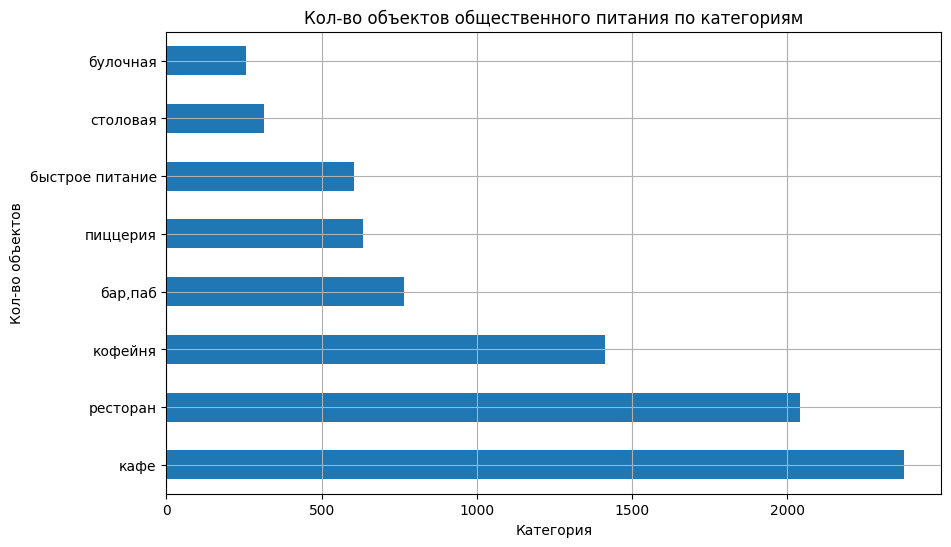

In [16]:
df.groupby('category')['id'].count().sort_values(ascending  = False).plot(kind = 'barh',                                         
                                title = 'Кол-во объектов общественного питания по категориям', 
                                figsize=(10, 6)
                                )

plt.xlabel('Категория')
plt.ylabel('Кол-во объектов')
plt.grid(True)

plt.show()

In [17]:
piv3 = pd.pivot_table(df, values = 'id' , index='category', aggfunc='count')

display(piv3)

,id
category,
"бар,паб",764
булочная,256
быстрое питание,603
кафе,2377
кофейня,1413
пиццерия,633
ресторан,2042
столовая,315


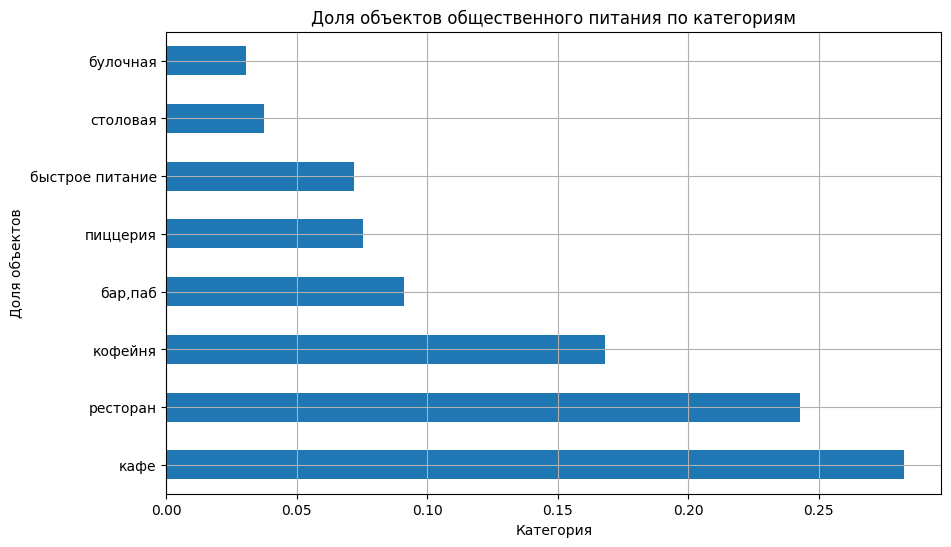

In [18]:
df['category'].value_counts(normalize=True).sort_values(ascending  = False).plot(kind = 'barh',                                         
                                title = 'Доля объектов общественного питания по категориям', 
                                figsize=(10, 6)
                                )

plt.xlabel('Категория')
plt.ylabel('Доля объектов')
plt.grid(True)

plt.show()

In [19]:
df['category'].value_counts(normalize=True).sort_values(ascending  = False)

category
кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: proportion, dtype: float64

Промежуточные выводы :

Можно заметить, что больше всего объектов общественного питания в категория кафе (2377).
Меньше всего заведений в категории булочная (256).

Распределение количества объектов общественного питания по категориям (от большего к меньшему):

1. кафе (2377);
2. ресторан (2042);
3. кофейня (1413);
4. бар,паб (764);
5. пиццерия (633);
6. быстрое пиатние (603);
7. столовая (315);
8. булочная (256).

Особенности распределенеия кол-ва объектов общественного питания по категориям:

- Можно предполоджить, что такое большое кол-во кафе связано с их популярностью из-за доступных цен (относительно ресторанов) и наличием в меню блюд здорового питания(по сравнению с пиццериями и быстрым питанием) среди потребителей. Для предпринимателей также есть ряд плюсов: на такие заведения есть большой спрос, их не так дорого содержать, как рестораны, которые входят в более дорогой сегмент заведений в целом, есть возможность открыть завдение по франшизе.
- Пиццерия и быстрое питание как категории очень близки по кол-ву объектов.
- Булочная является самой малочисленной категорией объектов общественного питания. У потребителей может быть низкий спрос на такие заведения, так как в них нет блюд для полноценного приема пищи. Соответсвенно, и предприниматели ориентируются на более прибыльные и востребованные категории объектов общественного питания.

---

### Задача 2

Исследуем распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводим подходящими визуализациями.

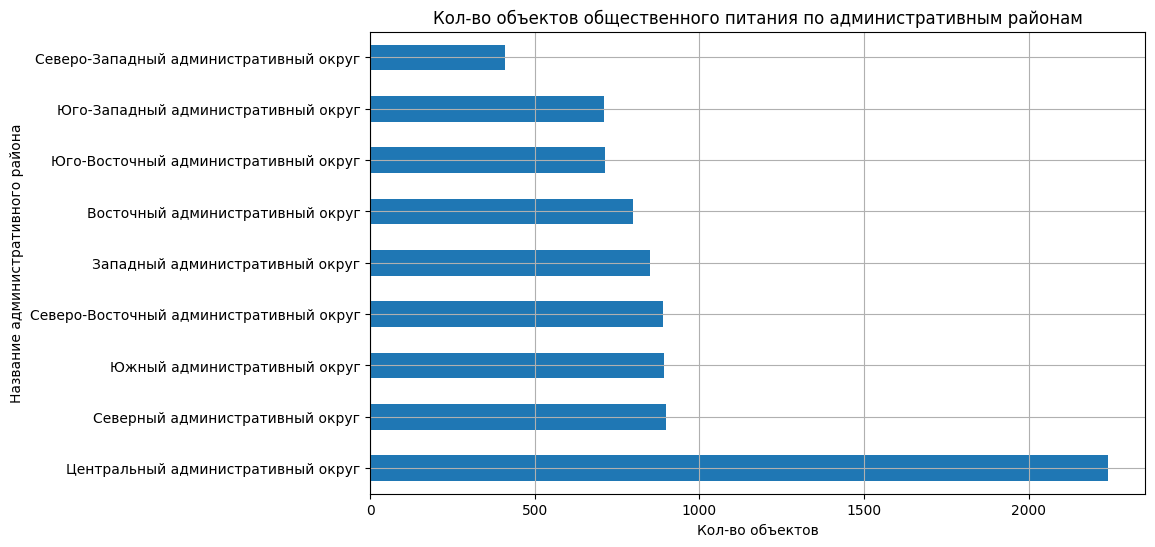

In [20]:
df.groupby('district')['id'].count().sort_values(ascending  = False).plot(kind = 'barh', 
                            title = 'Кол-во объектов общественного питания по административным районам', 
                            figsize = (10,6)
                            )
plt.xlabel('Кол-во объектов')
plt.ylabel('Название административного района')
plt.grid(True)
plt.show()

In [21]:
piv1 = pd.pivot_table(df, values = 'id' , index='district', aggfunc='count')

display(piv1)

,id
district,
Восточный административный округ,798
Западный административный округ,850
Северный административный округ,899
Северо-Восточный административный округ,890
Северо-Западный административный округ,409
Центральный административный округ,2242
Юго-Восточный административный округ,714
Юго-Западный административный округ,709
Южный административный округ,892


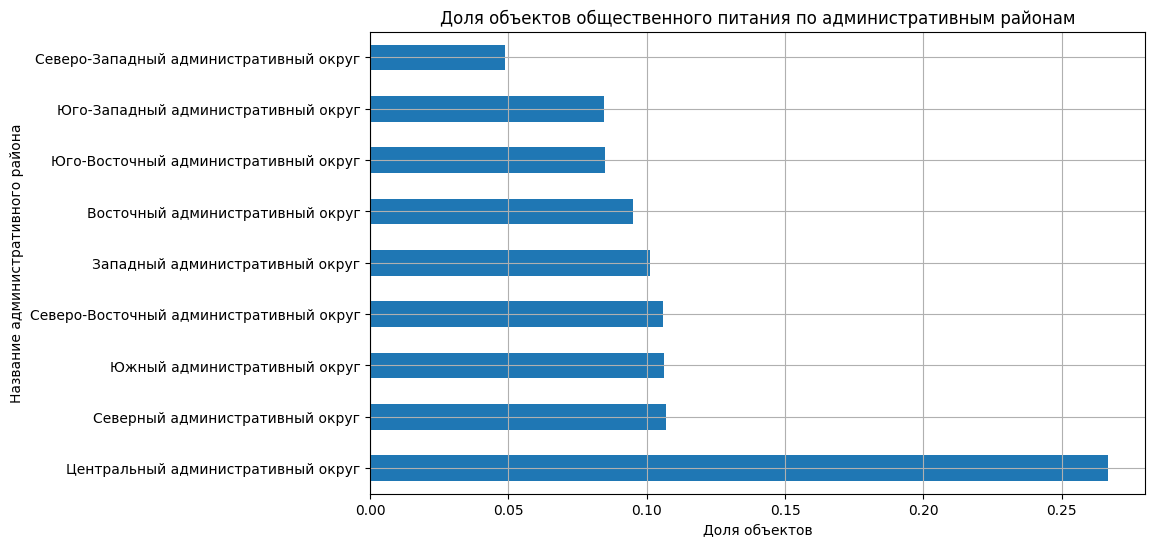

In [22]:
df['district'].value_counts(normalize=True).sort_values(ascending  = False).plot(kind = 'barh', 
                            title = 'Доля объектов общественного питания по административным районам', 
                            figsize = (10,6)
                            )
plt.xlabel('Доля объектов')
plt.ylabel('Название административного района')
plt.grid(True)
plt.show()

In [23]:
df['district'].value_counts(normalize=True).sort_values(ascending  = False)

district
Центральный административный округ         0.266809
Северный административный округ            0.106986
Южный административный округ               0.106153
Северо-Восточный административный округ    0.105915
Западный административный округ            0.101154
Восточный административный округ           0.094966
Юго-Восточный административный округ       0.084970
Юго-Западный административный округ        0.084375
Северо-Западный административный округ     0.048673
Name: proportion, dtype: float64

Промежуточные выводы (района будут обозначены аббревиатурами)<a id='3.2'></a>:
- Больше всего заведений в ЦАО (2242).
- Меньше всего заведений в СЗАО (409).

Распределение кол-ва объектов общественного питания по районам (от большего к меньшему):
1. ЦАО (2242);
2. САО (899);
3. ЮАО (892);
4. СВАО (890);
5. ЗАО (850);
6. ВАО (798);
7. ЮВАО (714);
8. ЮЗАO (709);
9. СЗАО (409).

Особенности распределения кол-ва заведений общественного питания по округам:

- Значения САО, СВАО, ЗАО, ЮЗАО И ЮВАО по количеству заведений очень близки к друг другу. 
- Малочисленность заведений в СЗАО можно объяснить тем, что не так много районов относятся к данному административному району.

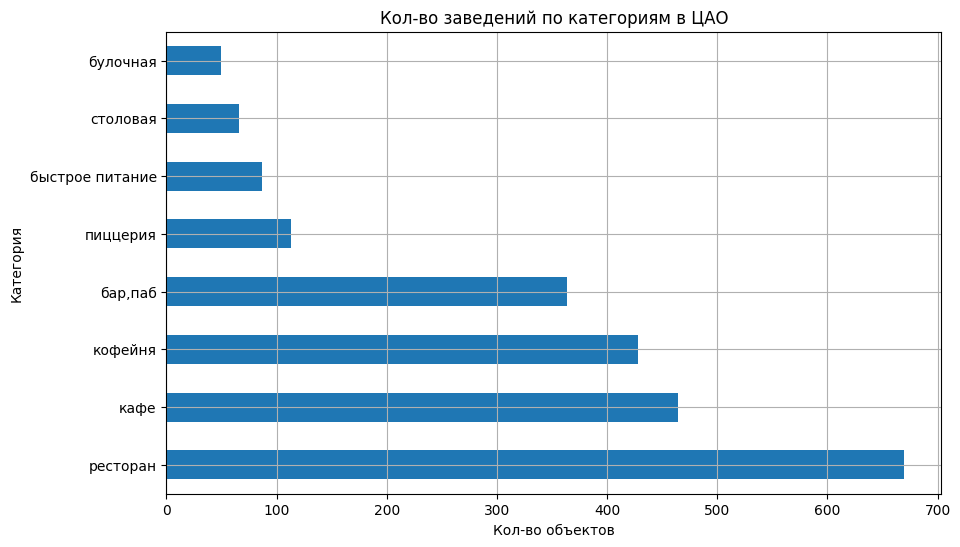

In [24]:
df_new = df
df_new = df_new.set_index('district')
df_new_loc = df_new.loc['Центральный административный округ', ['id', 'category']]

df_new_loc.groupby('category')['id'].count().sort_values(ascending  = False).plot(kind = 'barh',                                         
                                        title = 'Кол-во заведений по категориям в ЦАО', 
                                        figsize = (10, 6)
                                        )

plt.xlabel('Кол-во объектов')
plt.ylabel('Категория')

plt.grid(True)

plt.show()

In [25]:
piv = pd.pivot_table(df_new_loc, values = 'id' , index='category', columns='district', aggfunc='count')

display(piv)

district,Центральный административный округ
category,
"бар,паб",364
булочная,50
быстрое питание,87
кафе,464
кофейня,428
пиццерия,113
ресторан,670
столовая,66


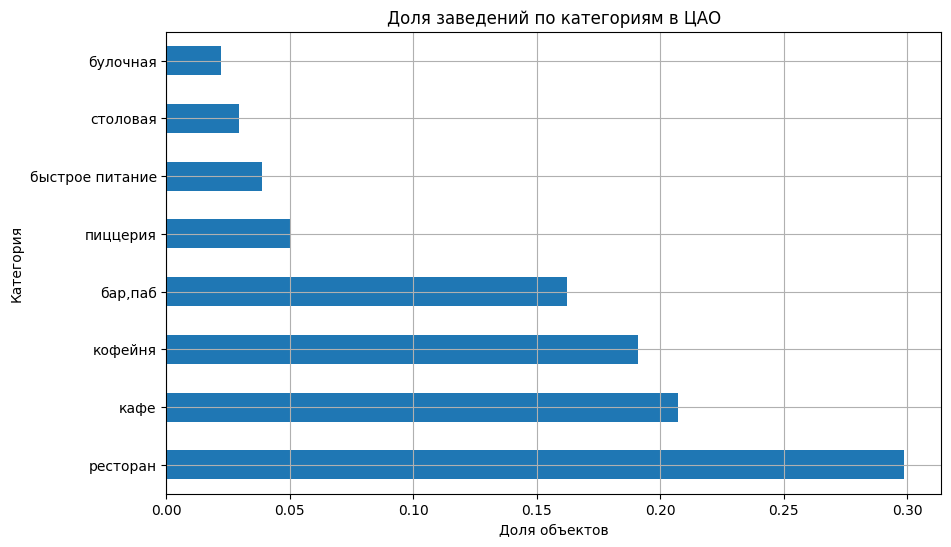

In [26]:
df_new_loc['category'].value_counts(normalize=True).sort_values(ascending  = False).plot(kind = 'barh',                                         
                                        title = 'Доля заведений по категориям в ЦАО', 
                                        figsize = (10, 6)
                                        )

plt.xlabel('Доля объектов')
plt.ylabel('Категория')

plt.grid(True)

plt.show()

In [27]:
df_new_loc['category'].value_counts(normalize=True).sort_values(ascending  = False)

category
ресторан           0.298840
кафе               0.206958
кофейня            0.190901
бар,паб            0.162355
пиццерия           0.050401
быстрое питание    0.038805
столовая           0.029438
булочная           0.022302
Name: proportion, dtype: float64

Промежуточные выводы:
- Можно заметить, что больше всего объектов общественного питания в категория ресторан (670). 
- Меньше всего заведений в категории булочная (50). 

Распределение количества объектов общественного питания по категориям (от большего к меньшему):
1. ресторан (670);
2. кафе (464);
3. кофейня (428);
4. бар,паб(364);
5. пиццерия(113);
6. быстрое пиатние (87);
7. столовая(66);
8. булочная (50).

Особенности распределенеия кол-ва объектов общественного питания по категориям:
- Большое кол-во ресторанов можно объяснить их расположением - в центре города. В центре живут более обеспеченные люди, всегда много туристов и желающих отдохнуть и вкусно поесть в хорошем месте. Такие потребители готовы платить за комфорт, качественное обслуживание, хорошую, вкусную еду, необычные блюда и т.д. Поэтому ресторанов в ЦАО больше [относительно общей картины по городу](#2A), где лидирующие позиции занимает кафе как категория с самым высоким кол-вом заведений по городу.
- Кафе занимают второе место по кoл-ву в ЦАО - все еще довольно популярное место среди бОльшей части потребителей из-за соотношения цена-качество предоставляемых услуг. 


---

### Задача 3

Изучим соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения.

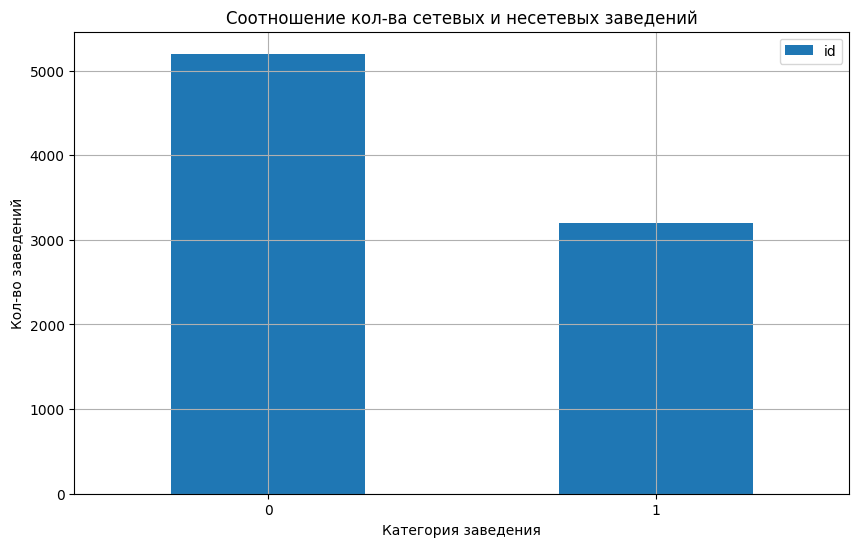

In [28]:
df.groupby('chain')['id'].count().plot(kind = 'bar', 
            xlabel = 'Категория заведения', 
            ylabel = 'Кол-во заведений', 
            title = 'Соотношение кол-ва сетевых и несетевых заведений', 
            legend = True,
            rot = 360, 
            figsize = (10,6)
            )

plt.grid(True)
plt.show()

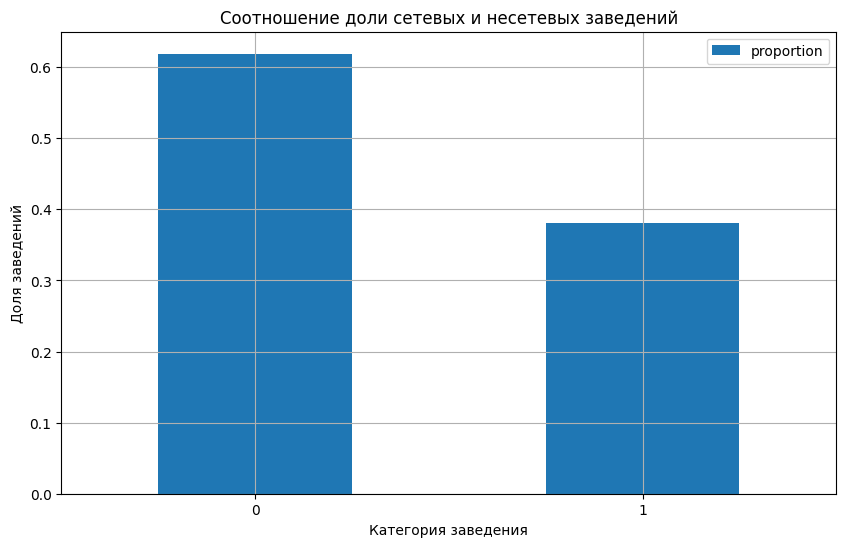

In [29]:
df['chain'].value_counts(normalize=True).sort_values(ascending  = False).plot(kind = 'bar', 
            xlabel = 'Категория заведения', 
            ylabel = 'Доля заведений', 
            title = 'Соотношение доли сетевых и несетевых заведений', 
            legend = True,
            rot = 360, 
            figsize = (10,6)
            )

plt.grid(True)
plt.show()

- 0 - несетевое, 1 - сетевое

Промежуточные выводы:
- Несетевых заведений (>5000, примерно 5100) больше, чем сетевых (>3000, примерно 3100). 

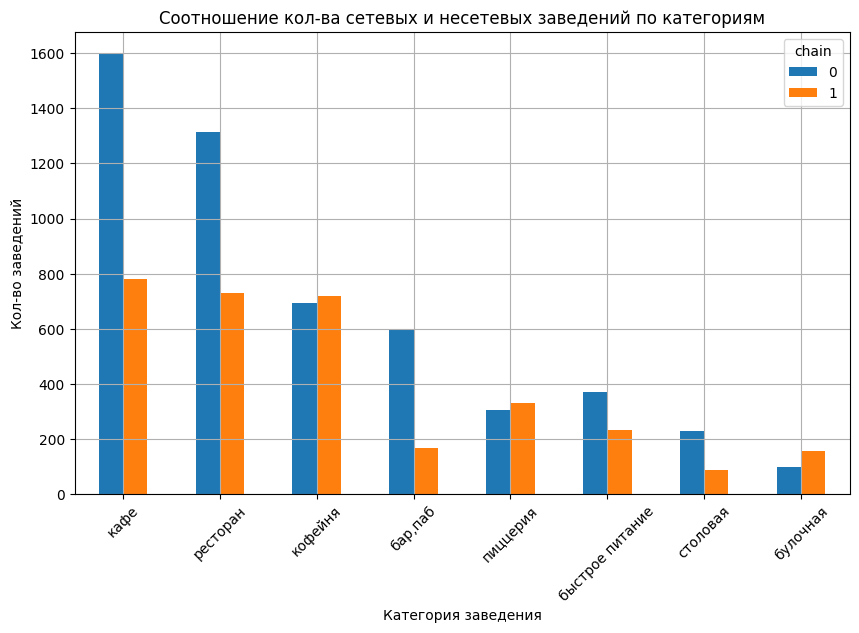

In [30]:
grouped = df.groupby(['category', 'chain'])['id'].count().unstack(fill_value=0)

grouped['sum'] = grouped.sum(axis=1)


grouped_sorted = grouped.sort_values('sum', ascending=False).drop(columns='sum')


grouped_sorted.plot(kind='bar',
                    xlabel='Категория заведения',
                    ylabel='Кол-во заведений',
                    title='Соотношение кол-ва сетевых и несетевых заведений по категориям',
                    legend=True,
                    rot=45,
                    figsize=(10, 6)
                   )
plt.grid(True)
plt.show()

In [31]:
piv55 = pd.pivot_table(df, values = 'id' , index='category', columns='chain', aggfunc='count')

display(piv55)

chain,0,1
category,,
"бар,паб",596,168
булочная,99,157
быстрое питание,371,232
кафе,1598,779
кофейня,693,720
пиццерия,303,330
ресторан,1313,729
столовая,227,88


- 0 - несетевое, 1 - сетевое

Промежуточные выводы: <a id='3.3'></a>
- Больше всего несетевых (1598) и сетевых (примерно 779) в категории кафе. Это вполне очевидно, ведь этих заведений в принипе [больше всего](#2A).
- Несетевых объектов меньше всего в категории булочная (99). Сетевых объектов меньше всего в категории столовая (88).

Распределение количества несетевых объектов общественного питания по категориям (от большего к меньшему):
1. кафе (1598);
2. ресторан (1313);
3. кофейня (693);
4. бар,паб(596);
5. быстрое питание(371);
6. пиццерия (303);
7. столовая(227);
8. булочная (99).

Распределение количества сетевых объектов общественного питания по категориям (от большего к меньшему):
1. кафе (779);
2. ресторан (729);
3. кофейня (720);
4. пиццерия (330);
5. быстрое питание(232);
6. бар,паб (168);
7. булочная(157);
8. столовая (88).

ВАЖНО! В данном анализе сетевые заведения были посчитаны все. Например, заведение "Иль Марко" - сетевое, мы его посчитали не один раз, а все заведения, которые встретились в датасете. 

Особенности распределенеия кол-ва объектов общественного питания по категориям:
- Количество несетевых мест в категории кафе и ресторан резко превышает количество несетевых мест по остальным категориям. 
- Количество сетевых заведений в катеогрии ресторан и кофейня очень близки к друг другу по значениям. 
- Количество сетевых заведений в катеогрии бар,паб и булочная очень близки к друг другу по значениям.
- Практически у всех категорий количество несетевых заведений превышает количество сетевых, кроме таких категорий, как булочная, кофейня, пиццерия. В остальных категориях количество несетевых мест резко превышает количество сетевых. 
- Несетевых заведений больше, чем сетевых.

---

### Задача 4

Исследуем количество посадочных мест в заведениях. Приведем для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводим подходящими визуализациями.


count        4792.0
mean     108.361436
std       122.84113
min             0.0
25%            40.0
50%            75.0
75%           140.0
95%           307.0
99%           625.0
max          1288.0
Name: seats, dtype: Float64

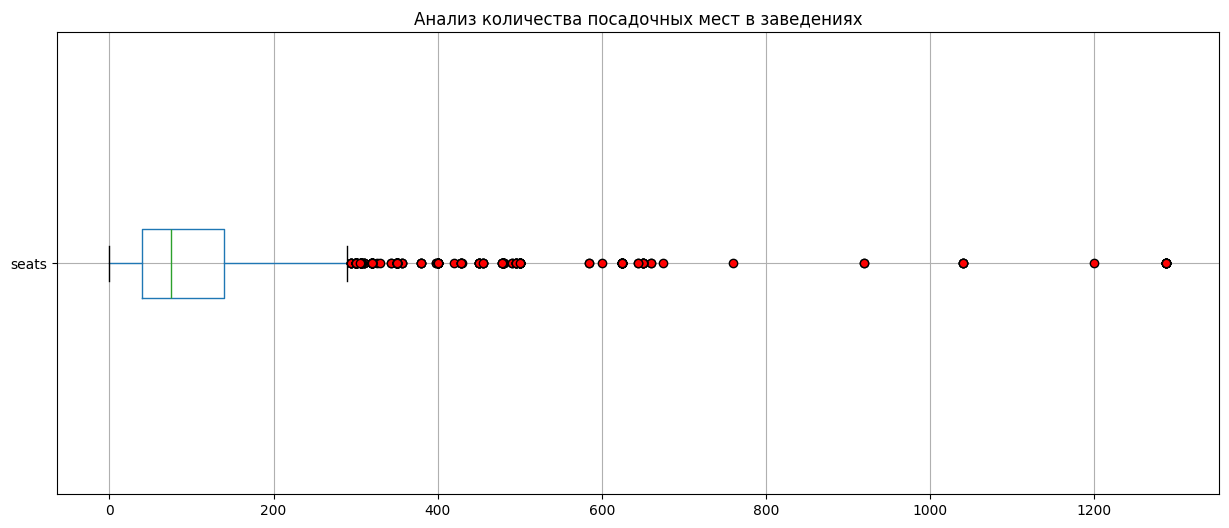

In [32]:
display(df['seats'].describe(percentiles = [0.25, 0.5, 0.75, 0.95, 0.99]))

df.boxplot(column = 'seats', 
          figsize = (15,6),
          vert = False, 
          flierprops=dict(markerfacecolor='r', marker='o')
          )
plt.grid(True)
plt.title('Анализ количества посадочных мест в заведениях')
plt.show()

Промежуточные выводы:<a id='3.4'></a>
- Разница между медианой (75) и средним значением (108.42) может свидетельствоать о большом кол-ве выбросов, это мы и наблюдаем на "ящике с усами".
- Аномалии в данныз начинаются со значений примерно равным 300 - наблюдаемый максимум без учета аномалий. Мы вывели 95-й и 99-й процентили, чтобы более точно определить, после каких значений можно наблюдать выбросы. Выбросы можно наблюдать после 95-ого и 99-ого процентилей, т. е. после значений 307 и 625. 
- Причина выбросов может быть в неверно введенных данных, возможно также, что некоторые объекты обществеенного питания особо крупные по размеру и вмещают большое кол-во гостей. 
- Макисмальное значение посадочных мест 1288. Оно находится за пределами наблюдаемого максимума без учета аномалий. 
- Распределение асимметричное, а именно оно является правоасимметоичным распределением. 
- Важно помнить, что в данных встречаются пропуски, а значени 0 также могут являться аномалией, хоть и не отображаться на графике выше как такие.

- Построим график распределения для большей наглядности. 

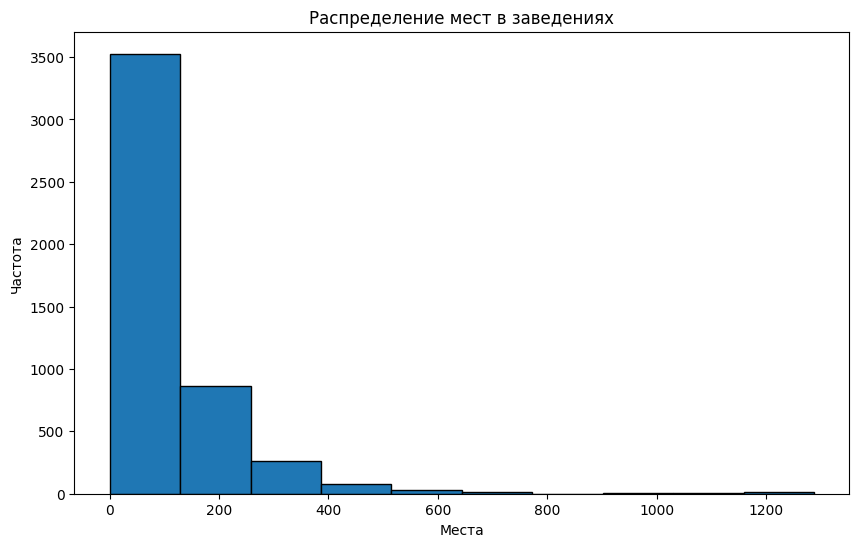

In [33]:
df['seats'].plot(kind = 'hist', 
                figsize = (10,6), 
                title = 'Распределение мест в заведениях',
                bins = 10, 
                alpha = 1,  
                edgecolor = 'black', 
                )
plt.xlabel('Места')
plt.ylabel('Частота')
plt.show()

- Посчитаем медианное значение количества мест по категориям объектов общественного питания. Именно медиана наиболее точно отобразит типичное кол-во посадочных мест для заведений каждой категории.

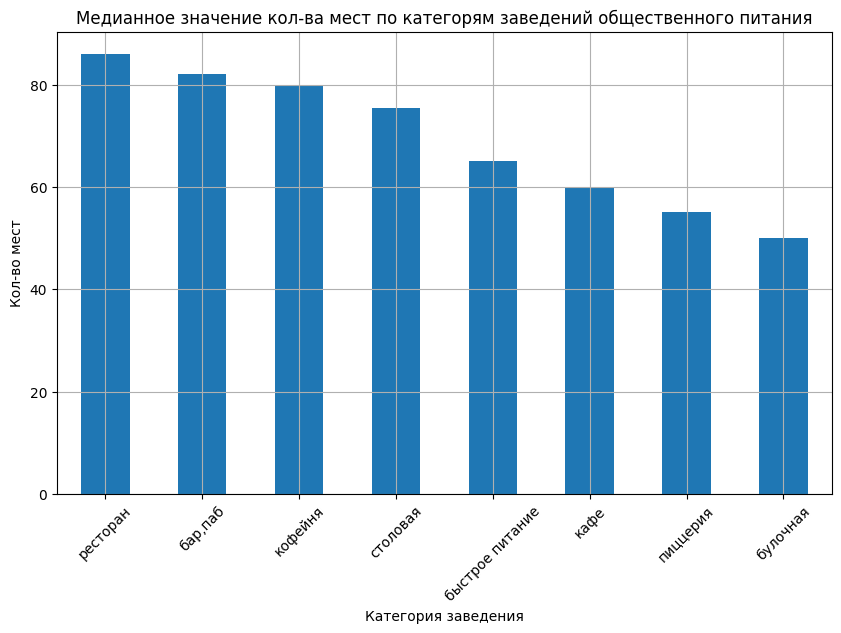

In [34]:
df.groupby('category')['seats'].median().sort_values(ascending  = False).plot(kind = 'bar',
                                             xlabel = 'Категория заведения',
                                             ylabel = 'Кол-во мест', 
                                             title = 'Медианное значение кол-ва мест по категорям заведений общественного питания', 
                                             rot = 45, 
                                             figsize = (10,6) 
                                             )
plt.grid(True)
plt.show()

In [35]:
piv4 = pd.pivot_table(df, values = 'seats' , index='category', aggfunc='median')

display(piv4)

,seats
category,
"бар,паб",82.0
булочная,50.0
быстрое питание,65.0
кафе,60.0
кофейня,80.0
пиццерия,55.0
ресторан,86.0
столовая,75.5


Промежуточные выводы:
- Самое высокое значение медианы кол-ва мест у заведений в категории рестораны (86)
- Самое низкое значение медианы кол-ва мест у заведений в категории булочная (50).

Распределение категорий заведений по медианному кол-ву посадочных мест(от большего к меньшему):
1. ресторан (86);
2. бар,паб (82.5);
3. кофейня (80);
4. столовая(75.5);
5. быстрое питание(65);
6. кафе (60);
7. пиццерия (55);
8. булочная (50).


Особенности распределенеия кол-ва объектов общественного питания по категориям:
- Вполне логично, что медиана посадочных мест в булочных неблольшая, такие заведения не содержат в меню блюд для полноценного приема пищи, соответсвенно, люди в таких местах проводят меньше времени, кто-то вообще забирает заказы с собой, проходимость высокая.
- У ресторанов самая большая медиана посадочных мест посадочных мест, так как в таких заведениях люди задерживаются на долго, проходимость ниже чем у булочных и кофеен, в таких заведениях также могут находиться крупные залы для проведения праздников, например. 

---

### Задача 5

Исследуем рейтинг заведений. Визуализируем распределение средних рейтингов по категориям заведений.

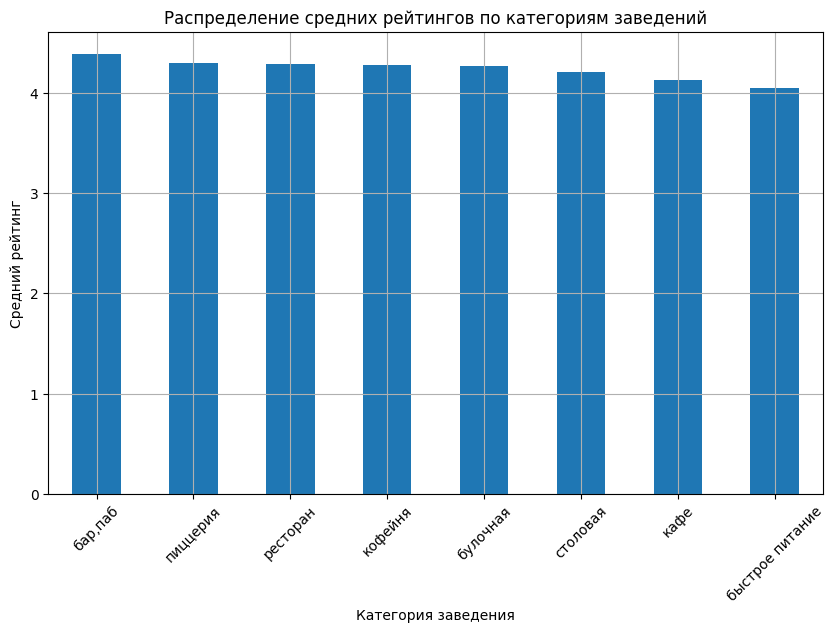

In [36]:
df.groupby('category')['rating'].mean().sort_values(ascending  = False).plot(kind = 'bar',
                                            xlabel = 'Категория заведения',
                                            ylabel = 'Средний рейтинг', 
                                            title = 'Распределение средних рейтингов по категориям заведений', 
                                            rot = 45,
                                            figsize = (10,6)
                                            )

plt.grid(True)
plt.show()

In [37]:
piv5 = pd.pivot_table(df, values = 'rating' , index='category', aggfunc='mean')

display(piv5)

,rating
category,
"бар,паб",4.387696
булочная,4.268359
быстрое питание,4.050249
кафе,4.123896
кофейня,4.277282
пиццерия,4.301264
ресторан,4.290402
столовая,4.211429


Промежуточные выводы: <a id='3.5'></a>

- Можно заметить, что средние рейтинги (среднее арифметическое) у всех заведений примерно одинаковое (>4). Вероятно они все колеблются от 4.0-4.3. 
- Самое высокое значение средней оценки можно отметить у категории бар,паб (4.39), а самое низкое - у категории быстрое питание (4.05). 

---

### Задача 6

Изучим, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построим и визуализируем матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберем самую сильную связь и проверим её.

,rating
price,0.344793
district,0.316524
category,0.271267
is_24_7,0.157314
chain,0.139391
seats,0.000000


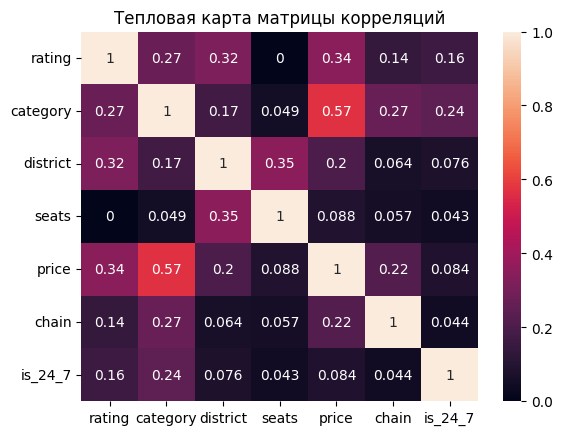

In [38]:
corr_columns = ['rating', 'category', 'district', 'seats', 'price', 'chain', 'is_24_7']

corr_matrix = df[corr_columns].phik_matrix(interval_cols=['seats', 'chain'])

display(corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values('rating', ascending=False))

sns.heatmap(corr_matrix, annot = True)

plt.title('Тепловая карта матрицы корреляций')
plt.show()

Промежуточные выводы: <a id='3.6'></a>

- Самая сильная корреляция рейтинга заведения наблюдается с категорией цен (примерно 0.22).
- Самая слабая коррелция рейтинга заведения наблюдается с признаком, является ли заведение сетевым или несетевым(примерно 0.108).
- Нулевая корреляция рейтинга заведения наблюдается с кол-вом мест в заведении.


- Отдельно изучим самую сильную связь между рейтингом заведения и категорией цен. 

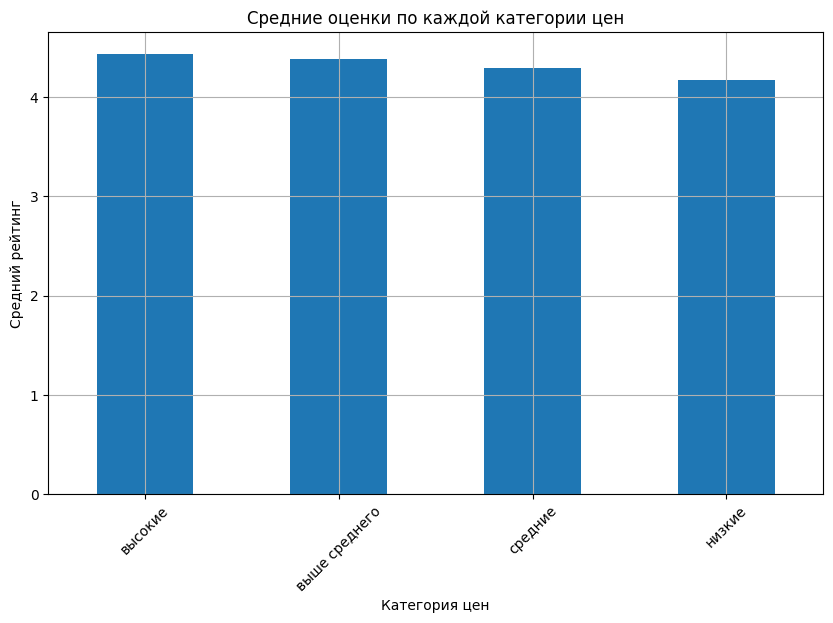

In [39]:
df.groupby('price')['rating'].mean().sort_values(ascending  = False).plot(kind = 'bar',
                                          xlabel = 'Категория цен',
                                          ylabel = 'Средний рейтинг',
                                          title = 'Средние оценки по каждой категории цен', 
                                          rot = 45, 
                                          figsize = (10,6)
                                         )
plt.grid(True)
plt.show()

In [40]:
piv5 = pd.pivot_table(df, values = 'rating' , index='price', aggfunc='mean')

display(piv5)

,rating
price,
высокие,4.436611
выше среднего,4.386348
низкие,4.173077
средние,4.297874


Промежуточные выводы:
- В принципе средние оценки во всех категориях цен схожи, колеблются приблизительно 4.1-4.4.
- Самое высокое среднее значение рейтинга у категории цен высокие (примерно 4.44).
- Самое низкое среднее значение рейтинга у категории цен низкие (примерно 4.17).

---

### Задача 7

Сгруппируем данные по названиям заведений и найдем топ-15 популярных сетей в Москве. Для них посчитаем значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводим подходящими визуализациями.

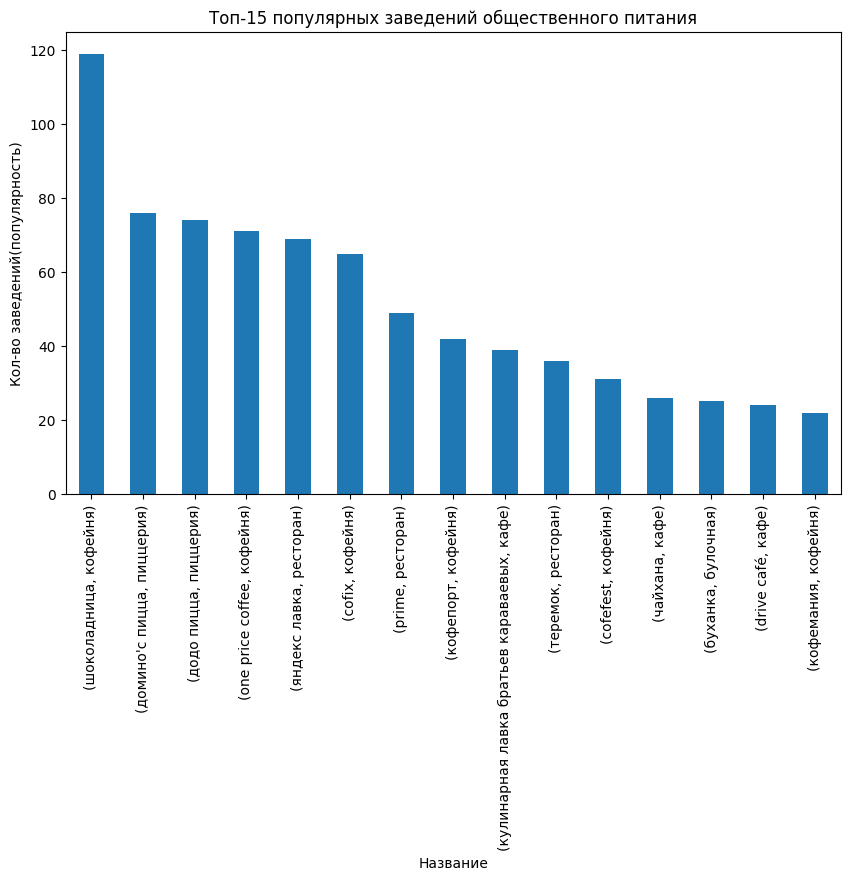

,,id,rating
name,category,,
шоколадница,кофейня,119,4.178151
домино'с пицца,пиццерия,76,4.169737
додо пицца,пиццерия,74,4.286486
one price coffee,кофейня,71,4.064789
яндекс лавка,ресторан,69,3.872464
cofix,кофейня,65,4.075385
prime,ресторан,49,4.114286
кофепорт,кофейня,42,4.147619
кулинарная лавка братьев караваевых,кафе,39,4.394872


In [41]:
dfdf = df
dfdf = dfdf.set_index('chain')
dfdf_loc = dfdf.loc[1, ['name', 'category', 'id', 'rating']]


dfdf_loc.groupby(['name', 'category'])['id'].count().sort_values( ascending = False).head(15).plot(kind = 'bar',
                                                                xlabel = 'Название',
                                                                ylabel = 'Кол-во заведений(популярность)',
                                                                title = 'Топ-15 популярных заведений общественного питания', 
                                                                figsize = (10,6)
                                                                             )
plt.show()

display(dfdf_loc.groupby(['name', 'category']).agg({'id': 'count', 'rating' : 'mean'}).sort_values(by = 'id', ascending = False).head(15))

Промежуточные выводы: <a id='3.7'></a>
- Самое популярное заведение с названием "Шоколадница" и категорией кофейня(119). 
- Самое непопулярное заведение с названием "Кофемания" и категорией кофейня(22). 
- Примерно одинаковые по популярности "Ресторан" (33) в категории ресторан, "Шаурма" (32) в категории быстрое питание и "CofeFest" в категории кофейня(31).
- Самый высокий рейтинг у заведения с названием "Кофемания" (4.46). Это самое непопулярное заведение в регионе.
- Самый низкий рейтинг у заведений с названием "Яндекс Лавка" (3.87). Это относительно популярное заведение в регионе (69), относится к категории ресторан. 
- Больше всего в топе представлено заведений в категории кофейня. 


---

### Задача 8

Изучим вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируем цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводим подходящими визуализациями.


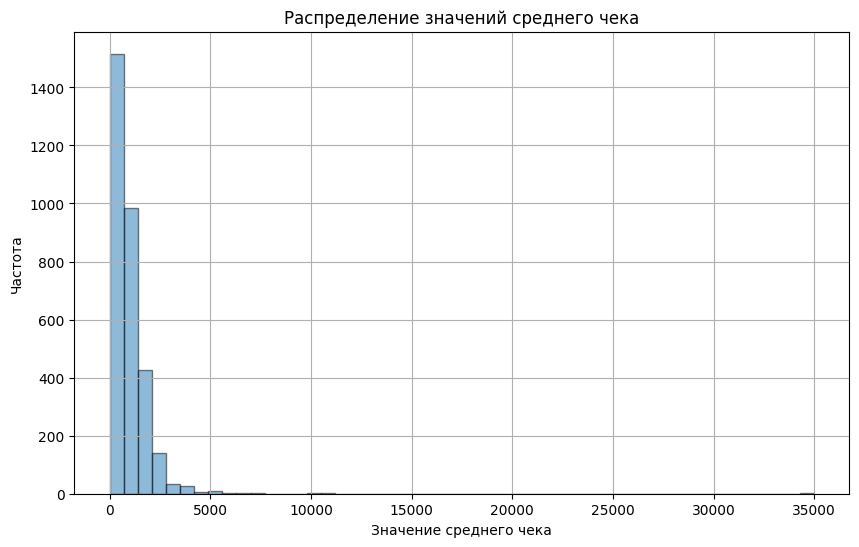

In [42]:
plt.figure(figsize = (10,6))
df['middle_avg_bill'].plot(kind = 'hist', 
                          alpha = 0.5, 
                          edgecolor = 'black', 
                          bins = 50)

plt.grid(True)
plt.title('Распределение значений среднего чека')
plt.xlabel('Значение среднего чека')
plt.ylabel('Частота')
plt.show() 

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

<Axes: >

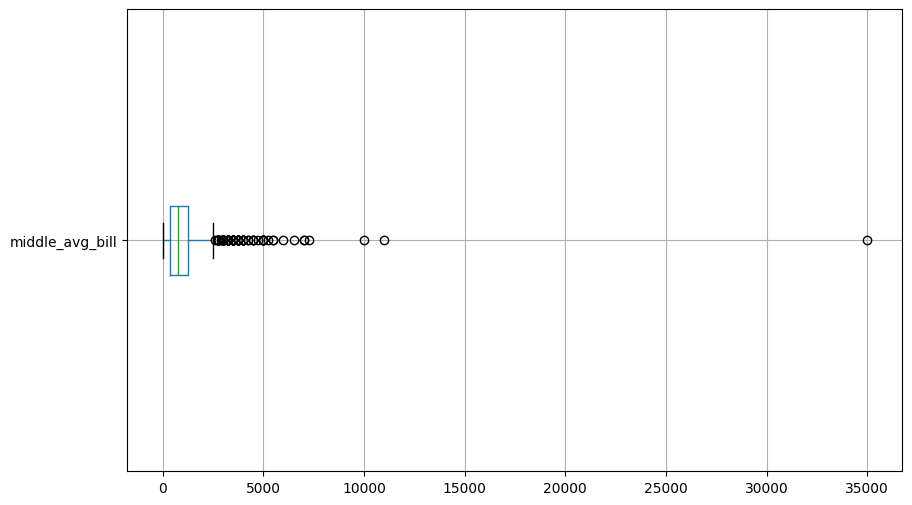

In [43]:
display(df['middle_avg_bill'].describe())

df.boxplot(column = 'middle_avg_bill', 
          vert = False, 
          figsize = (10,6))

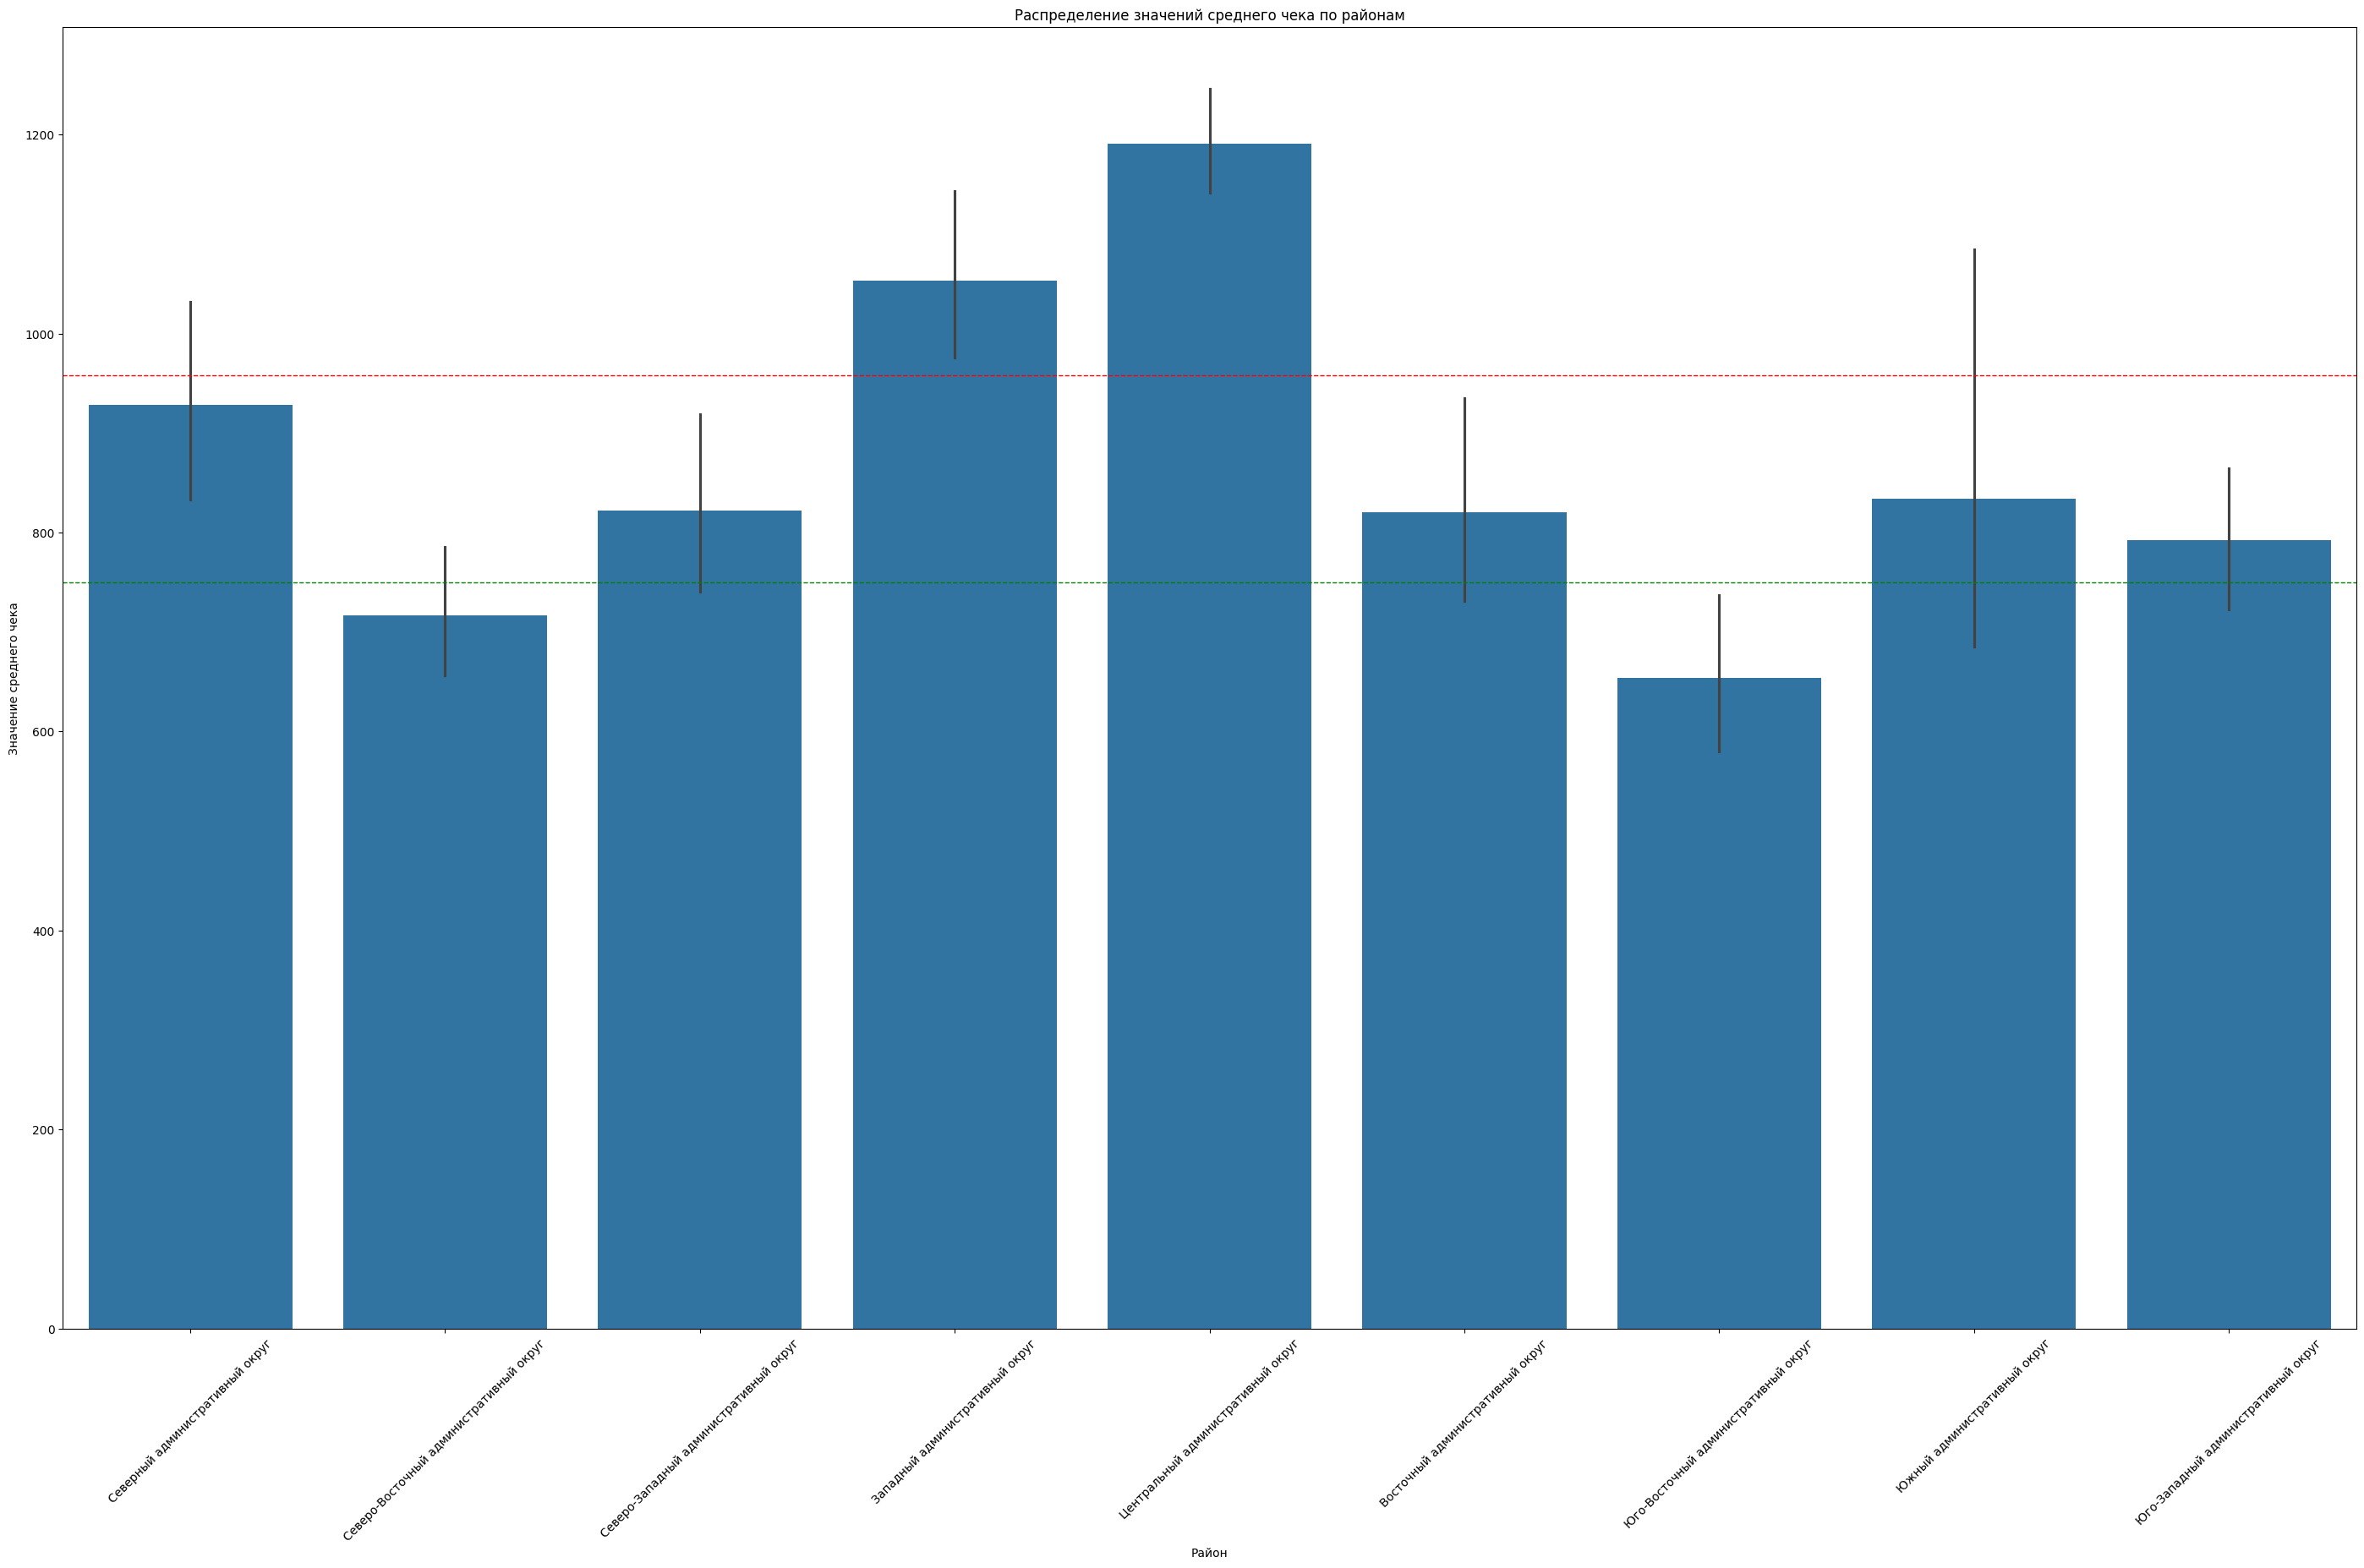

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Восточный административный округ,260.0,820.626923,850.903310,50.0,338.00,575.0,1100.0,10000.0
Западный административный округ,306.0,1053.225490,779.008536,50.0,427.50,1000.0,1500.0,5250.0
Северный административный округ,322.0,927.959627,912.609221,130.0,350.00,650.0,1250.0,11000.0
Северо-Восточный административный округ,301.0,716.611296,591.232153,50.0,325.00,500.0,950.0,4500.0
Северо-Западный административный округ,157.0,822.222930,595.055218,120.0,340.00,700.0,1100.0,2900.0
Центральный административный округ,1060.0,1191.057547,920.014707,0.0,500.00,1000.0,1500.0,7250.0
Юго-Восточный административный округ,194.0,654.097938,566.825663,30.0,281.25,450.0,887.5,3750.0
Юго-Западный административный округ,235.0,792.561702,559.173122,100.0,350.00,600.0,1100.0,2750.0
Южный административный округ,314.0,834.398089,2008.640596,100.0,350.00,500.0,1037.5,35000.0


In [44]:
plt.figure(figsize = (35,20))

sns.barplot(data = df, x = 'district', y = 'middle_avg_bill') 


plt.xticks(rotation=45) 
plt.title('Распределение значений среднего чека по районам')
plt.xlabel('Район')
plt.ylabel('Значение среднего чека')

mean_value = df['middle_avg_bill'].mean()
median_value = df['middle_avg_bill'].median()

plt.axhline(mean_value, color='red',
                linestyle='--', linewidth=1)
plt.axhline(median_value, color='green',
                linestyle='--', linewidth=1)

plt.show() 

df.groupby('district')['middle_avg_bill'].describe()

Важно! Не все выбросы в данном случае отображены визуально.

Промежуточные выводы: <a id='3.8'></a>
- Выбросы могут быть обоснованы в данном случае, так как  значения среднего чека могут быть больше наблюдаемого максимума, так как некоторые заказы могут быть особенно дорогими, если в заведении заказали провести крупное мероприятие, например. 

Выводы по каждому административному району:
1. ЦАО: больше всего непустых строк в столбце со значениями среднего чека, среднее арифмитическое не сильно отличается от медианы, минимальное значение равно нулю, что скорее всего является ошибкой или аномалией, самое высокое значение медианного среднего чека по всем районам, все остальные показатели в пределах нормы;
2. ЮАО: среднее арифметическое отличается от медианы на относительно большую величину (примерно 300), это может быть объяснено тем, что в данном районе показатель максимального значения составил 35000, что очевидно является выбросом. Как было упомянуто ранее такие выбросы могут быть в рамках нормы, но могут быть и аномалией, для более точного ответа требуется более подробно изучить, какое заведение имеет такой чек. В данном районе самое высокое значение стандартного отклонения;
3. САО: среднее арифметическое отличается от медианы на относительно большую величину (примерно 300), самое высокое минимальное значение среднего чека (130), все остальные показатели находятся в пределах нормы;
4. СВАО: среднее арифмитическое не сильно отличается от медианы, одно из самых низких минимальных значений среднего чека, остальные показатели в норме;
5. ЗАО: среднее арифмитическое не сильно отличается от медианы, одно из самых низких минимальных значений среднего чека, самое высокое значение медианного среднего чека по всем районам, остальные показатели в норме;
6. ВАО: среднее арифметическое отличается от медианы на относительно большую величину (примерно 300),одно из самых низких минимальных значений среднего чека, все остальные показатели находятся в пределах нормы;
7. ЮЗАО: среднее арифмитическое не сильно отличается от медианы,  остальные показатели в норме
8. ЮВАО: слишком маленькое значение минимального среднего чека (30), может быть аномалией, среднее арифмитическое не сильно отличается от медианы, все остальные показатели находятся в пределах нормы;
9. СЗАО: меньше всего непустых строк в столбце со значениями среднего чека, среднее арифмитическое не сильно отличается от медианы, все остальные показатели находятся в пределах нормы .

- Можно заметить, что у ЦАО одни из самых высоких средних арифметических значечений и медиан по всем районам. Тем не менее ЗАО имеет такую же медиану, как и ЦАО, а самое высокое максимальное значение среднего чека у ЮАО. Конечно, в центре средние цены и чеки будут выше, чем на окраинах, тем не менее для более точной оценки требуется подробно изучить, как сетевые и несетевые заведение раскиданы по Москве, возможно их расположение неоднородно и в каких-то районах их больше, в каких-то их меньше. Но точно можно сказать, что денежный оборот у заведений в центре выше.

Промежуточные выводы:
- 

---

### Промежуточный вывод

Обобщим полученные результаты.

Промежуточные выводы по каждой задаче:
- [Промежуточный вывод по задаче 1 (3.1)](#3.1).
- [Промежуточный вывод по задаче 2 (3.2)](#3.2).
- [Промежуточный вывод по задаче 3 (3.3)](#3.3).
- [Промежуточный вывод по задаче 4 (3.4)](#3.4).
- [Промежуточный вывод по задаче 5 (3.5)](#3.5).
- [Промежуточный вывод по задаче 6 (3.6)](#3.6).
- [Промежуточный вывод по задаче 7 (3.7)](#3.7).
- [Промежуточный вывод по задаче 8 (3.8)](#3.8).

Важные тезисы из промежуточных выводов по каждой задаче:
- Можно заметить, что больше всего объектов общественного питания в категория кафе. 
- Меньше всего заведений в категории булочная. 
- Больше всего заведений в ЦАО. Можно заметить, что больше всего объектов общественного питания в категория ресторан. Меньше всего заведений в категории булочная. 
- Меньше всего заведений в СЗАО. Малочисленность заведений в СЗАО можно объяснить тем, что не так много районов относятся к данному административному району.
- Несетевых заведений больше, чем сетевых. Количество несетевых мест в категории кафе и ресторан резко превышает количество несетевых мест по остальным категориям. 
- Самое высокое значение медианы кол-ва мест у заведений в категории рестораны. 
- Самое низкое значение медианы кол-ва мест у заведений в категории булочная. 
- Можно заметить, что средние рейтинги (среднее арифметическое) у всех заведений примерно одинаковое (>4). Вероятно они все колеблются от 4.0-4.3. 
- Самая сильная корреляция рейтинга заведения наблюдается с категорией цен (примерно 0.22). Нулевая корреляция рейтинга заведения наблюдается с кол-вом мест в заведении.
- Самое популярное заведение с названием "Шоколадница" и категорией кофейня. 
- Самое непопулярное заведение с названием "Кофемания" и категорией кафе. при этом у нее самый высокий рейтинг.
- Больше всего в топе-15 популярных заведений общественного питания представлено заведений в категории кофейня. 
- Самый высокий рейтинг у заведения с название "Кофемания" (4.46). 
- Самый низкий рейтинг у заведений с названием "Яндекс Лавка" (3.87). 
- Можно заметить, что у ЦАО одни из самых высоких средних арифметических значечений и медиан средних чеков по всем районам. Тем не менее ЗАО имеет такую же медиану, как и ЦАО, а самое высокое максимальное значение среднего чека у ЮАО. Конечно, в центре средние цены и чеки будут выше, чем на окраинах, тем не менее для более точной оценки требуется подробно изучить, как сетевые и несетевые заведение раскиданы по Москве, возможно их расположение неоднородно и в каких-то районах их больше, в каких-то их меньше. Но точно можно сказать, что денежный оборот у заведений в центре выше.

## 4. Итоговый вывод и рекомендации

Общий обзор проделанной работы.

- Была проведена подготовительная работа в Шаге 1 и 2, в Шаге 3 были получены ответы на вопросы заказчика с помощью инструментов визуализации. В целом, исследование позволило сформировать общее представление о популярных заведениях общественного питания Москвы, уровне востребованности среди людей тех или иных объектов, получено представление о средних ценах и рейтингах заведений.

Ответы на исследовательские вопросы, или главные выводы.

1. В датасете представлены следующие категории звадений: кафе, ресторан, кофейня, бар,паб, пиццерия, быстрое питание, столовая, булочная. Больше всего заведений в категории кафе, меньше всего - в категории булочная.

2. В датасете представлены все административные районы Москвы (ЦАО, ЮАО, САО, СВАО, ЗАО, ВАО, ЮЗАО, ЮВАО, СЗАО). Больше всего заведений в ЦАО, меньше всего в СЗАО. Больше всего в ЦАО - ресторанов, меньше всего - булочных. 

3. Несетевых заведений больше, чем сетевых. Больше всего несетевых и сетевых в категории кафе. Несетевых объектов меньше всего в категории булочная. Сетевых объектов меньше всего в категории столовая.

4. В данных по посадолчным местам наблюдаеются пропуски, нулевые значения и выбросы, которые являются аномалиями, причиной которых могут быть ошибки внесения данных. Самое высокое значение медианы кол-ва мест у заведений в категории рестораны. Самое низкое значение медианы кол-ва мест у заведений в категории булочная.

5. Можно заметить, что средние рейтинги (среднее арифметическое) у всех заведений примерно одинаковое (>4). Вероятно они все колеблются от 4.0-4.3.

6. Самая сильная корреляция рейтинга заведения наблюдается с категорией цен. В принципе средние оценки во всех категориях цен схожи, колеблются приблизительно 4.1-4.4. Самая слабая коррелция рейтинга заведения наблюдается с признаком, является ли заведение сетевым или несетевым. Нулевая корреляция рейтинга заведения наблюдается с кол-вом мест в заведении.

7. Топ-15 попклярных заведений общественного питания в Москве (под популярностью понимается количество заведений этой сети в регионе): Шоколадница, Домино'с Пицца, Додо Пицца, One Price Coffee, Яндекс Лавка, Cofix, Prime, КОФЕПОРТ, Кулинарная лавка братьев Караваевых, Теремок, CofeFest, Чайхана	кафе, Буханка, Drive Café, Кофемания. Самое популярное заведение с названием "Шоколадница" и категорией кофейня. Самое непопулярное заведение с названием "Кофемания" и категорией кофейня. Самый высокий рейтинг у заведения с название "Кофемания" (4.46). Это самое непопулярное заведение в регионе, относится к категории кофейня. Самый низкий рейтинг у заведений с названием "Яндекс Лавка" (3.87). Это относительно популярное заведение, категория ресторан.

8. Можно заметить, что у ЦАО одни из самых высоких средних арифметических значечений и медиан средних чеков по всем районам. Тем не менее ЗАО имеет такую же медиану, как и ЦАО, а самое высокое максимальное значение среднего чека у ЮАО. В центре средние цены и чеки будут выше, чем на окраинах. Точно можно сказать, что денежный оборот у заведений в центре выше.

Рекомендации на основе анализа данных.

- Возможно инвесторам из фонда Shut Up and Take My Money стоит обратить внимание на менее популярные категории заведений, например кофейни или пиццерии, где возможно меньше, чем у кафе и ресторанов. Но в таком случае нужно учитывать корреляцию между категорией цен и рейтингами, так как она самая сильная и может влиять на развитие бизнеса в долгосрочной перспективе. В вопросе расположения можно также обратить не на ЦАО (так как требования к уровню заведений в центре выше, конкуренция также выше), а на другие районы, но на приближенную к центру их чать, так как средниче чеки в ЦАО и ,логично, ближе к центру выше. Возможно стоит обратить внимание нга покупку франшизы для открытия сетевого заведения, так как их, по итогам исследования, меньше, а репутация у подобных заведений есть уже на старте. Но требуется тогда более подробно изучить распределение сетевых заведений по Москве и выбрать район, где возможно таких заведений будет меньше, чтобы не столкнуться с высокой конкурентностью и при этом заполучить всех клиентов района. В целом при выборе октрытия сетевого заведения требуется изучить данные заведения более детально. 